Shows the average length of the corpora

In [74]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [75]:
def read_in_data(num):
    corpus_list=["cmv-hidey","usdeb","essay_1","micro_struc"]

    data = []

    print("Choosen corpus is:",corpus_list[num])


    with open("Data/"+corpus_list[num]+".json") as f:
        for line in f:
            data.append(json.loads(line))

    df = pd.DataFrame(data)
    
    if num ==3:
       
        df=df.drop("discourse",axis=1)
    
    return df

In [76]:
df=read_in_data(3)

Choosen corpus is: micro_struc


In [77]:
#sort lists ascending and give back a list of indexes
def sort_index(lst, rev=True):
    index = range(len(lst))
    s = sorted(index, reverse=rev, key=lambda i: lst[i])
    return s

In [78]:
#get the length of sentences and the role of the longest sentences
#In: a corpus as a dataframe


def get_sentence_length(data):
    
    
    #list containing the average length of senteces per text
    av_text=[]

    #list containing lists with the length of each sentence in each text
    sent_per_text=[]

    
    
    all_sent=[]
    sent_count_list=[]
    for i in range(len(df)):

        sentences=[]
        sent_count=0
        #loop over all texts
        for j in df.iloc[i,4]["units"]:

            tokens=j["tokens"]

            sentences.append(len(tokens))
            sent_count +=1
            all_sent.append(len(tokens))

        sent_per_text.append(sentences)
        
        av_text.append(sum(sentences)/len(sentences))

        sent_count_list.append(sent_count)

    #print("Average length of sentences of each text:",av_text)
    av_all=sum(av_text)/len(av_text)

    print("Average length of sentences over whole corpus:", sum(all_sent)/len(all_sent))

    print("Average length of each text:", av_all)

    print("Average number of sentence in one text",sum(sent_count_list)/len(sent_count_list))
    
    prem=0
    claim=0
    mjclaim=0
    

    for i in range(len(df)):

        index_list=sort_index(sent_per_text[i]) 

        unit_list=df.iloc[i,4]["units"]

        #get the indices of the 3 longest sentences
        for j in index_list[0:3]:

            #check their role
            role=unit_list[j]["attributes"]["role"]

            if role=="Premise":
                prem +=1
            elif role=="Claim":
                claim +=1
            elif role=="MajorClaim":
                mjclaim +=1
            else:
                raise ValueError(str(role) + ' is not a known value')

    
    print("Found",prem, "premises")   
    print("Found",claim, "claims")  
    print("Found",mjclaim,"major claims")
    
    all_sent.sort()
    f = plt.figure(1)
    plt.hist(all_sent, density=False,bins=40)
    plt.xlabel("Length of all sentences of all texts")
    
    
    av_text.sort()
    g=plt.figure(2)
    plt.hist(av_text, density=False, bins=30)
    plt.xlabel("Average length sentences ")
   


Average length of sentences over whole corpus: 15.354166666666666
Average length of each text: 15.397852891156464
Average number of sentence in one text 5.142857142857143
Found 273 premises
Found 63 claims
Found 0 major claims


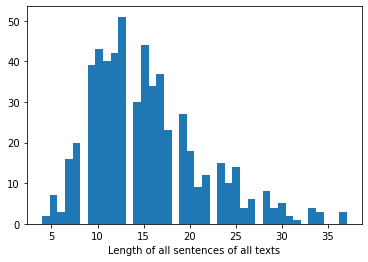

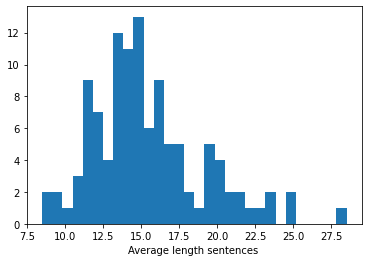

In [79]:
get_sentence_length(df)

In [80]:
df.head()

,docID,meta,text,sentences,argumentation
0,micro_00000,{'title': 'TXL_airport_remain_operational_afte...,As a central airport Berlin Tegel is particula...,"[{'tokens': [{'id': 0, 'gid': 0, 'sid': 0, 'su...","{'units': [{'tokens': [0, 1, 2, 3, 4, 5, 6, 7,..."
1,micro_00001,"{'title': 'school_uniforms', 'corpus': 'micro'...",School uniforms should not be worn in our scho...,"[{'tokens': [{'id': 0, 'gid': 0, 'sid': 0, 'su...","{'units': [{'tokens': [0, 1, 2, 3, 4, 5, 6, 7,..."
2,micro_00002,{'title': 'health_insurance_cover_complementar...,Health insurance companies should naturally co...,"[{'tokens': [{'id': 0, 'gid': 0, 'sid': 0, 'su...","{'units': [{'tokens': [0, 1, 2, 3, 4, 5, 6, 7,..."
3,micro_00003,"{'title': 'keep_retirement_at_63', 'corpus': '...",The implementation of retirement at 63 is no l...,"[{'tokens': [{'id': 0, 'gid': 0, 'sid': 0, 'su...","{'units': [{'tokens': [0, 1, 2, 3, 4, 5, 6, 7,..."
4,micro_00004,{'title': 'health_insurance_cover_complementar...,The statutory health insurance companies shoul...,"[{'tokens': [{'id': 0, 'gid': 0, 'sid': 0, 'su...","{'units': [{'tokens': [0, 1, 2, 3, 4, 5, 6, 7,..."
